In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Drug.csv to Drug (2).csv


In [ ]:
data=pd.read_csv('Drug.csv')

In [ ]:
data.head()

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction,Information
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
1,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
2,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX,755,2.78,3.00,2.08,\r\n\t\t\t\t\t This is a generic drug. The ave...
3,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...
4,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...


## Exploratory Data Analysis (EDA)

In [ ]:
data.shape

(2219, 9)

In [ ]:
# finding duplicates
data[data.duplicated()]

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction,Information
1,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
4,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...
5,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...
6,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...
7,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...
...,...,...,...,...,...,...,...,...,...
2187,vertigo,Diphenhydramine Hcl,On Label,OTC,1,5.00,5.00,5.00,\r\n\t\t\t\t\t This is a generic drug. You can...
2188,vertigo,Diphenhydramine Hcl,On Label,OTC,1,4.00,5.00,3.00,\r\n\t\t\t\t\t This is a generic drug. You can...
2189,vertigo,Diphenhydramine Hcl,On Label,OTC,1,3.00,4.00,4.00,\r\n\t\t\t\t\t This is a generic drug. You can...
2193,vulvovaginal candidiasis,Fluconazole,On Label,RX,225,3.32,4.41,2.97,\r\n\t\t\t\t\tFluconazole is used to treat vag...


In [ ]:
# removing duplicates
data1=data.drop_duplicates()

In [ ]:
# finding duplicates
data1[data1.duplicated()]     # no duplicates

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction,Information


In [ ]:
data1

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction,Information
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
2,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX,755,2.78,3.00,2.08,\r\n\t\t\t\t\t This is a generic drug. The ave...
3,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...
8,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,On Label,RX,437,3.26,3.23,2.42,\r\n\t\t\t\t\tAmoxicillin/clavulanic acid is a...
11,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,361,2.44,2.96,1.68,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
...,...,...,...,...,...,...,...,...,...
2214,vulvovaginal candidiasis,Clotrimazole,On Label,OTC,2,5.00,5.00,5.00,\r\n\t\t\t\t\tClotrimazole is used to treat sk...
2215,vulvovaginal candidiasis,Butoconazole Nitrate,On Label,RX,1,5.00,5.00,5.00,\r\n\t\t\t\t\tThis medication is used to treat...
2216,vulvovaginal candidiasis,Clotrimazole,On Label,OTC,1,5.00,4.00,5.00,\r\n\t\t\t\t\tClotrimazole is used to treat sk...
2217,vulvovaginal candidiasis,Butoconazole Nitrate,On Label,OTC,1,5.00,5.00,5.00,\r\n\t\t\t\t\tThis medication is used to treat...


In [ ]:
# resetting index
data2=data1.reset_index()
data3=data2.drop('index',axis=1)
data3.head()

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction,Information
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
1,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX,755,2.78,3.00,2.08,\r\n\t\t\t\t\t This is a generic drug. The ave...
2,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...
3,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,On Label,RX,437,3.26,3.23,2.42,\r\n\t\t\t\t\tAmoxicillin/clavulanic acid is a...
4,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,361,2.44,2.96,1.68,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...


In [ ]:
data3.shape

(1753, 9)

In [ ]:
# dropping information column
data4=data3.drop('Information',axis=1)
data4.head()

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994,2.52,3.01,1.84
1,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX,755,2.78,3.00,2.08
2,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584,3.21,4.01,2.57
3,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,On Label,RX,437,3.26,3.23,2.42
4,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,361,2.44,2.96,1.68


In [ ]:
data4.info()       # missing values present in Indication and Type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1753 entries, 0 to 1752
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Condition     1753 non-null   object 
 1   Drug          1753 non-null   object 
 2   Indication    1723 non-null   object 
 3   Type          1748 non-null   object 
 4   Reviews       1753 non-null   int64  
 5   Effective     1753 non-null   float64
 6   EaseOfUse     1753 non-null   float64
 7   Satisfaction  1753 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 109.7+ KB


In [ ]:
data4.Indication.value_counts()           # mode= On label

On Label     1339
Off Label     384
Name: Indication, dtype: int64

In [ ]:
data4.Type.value_counts()               # mode= RX

RX        1165
OTC        549
RX/OTC      34
Name: Type, dtype: int64

In [ ]:
# mode imputation on Indication column
data4['Indication'] = data4['Indication'].fillna('On Label')
# mode imputation on Type column
data4['Type']=data4['Type'].fillna('RX')

In [ ]:
data4.info()          # no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1753 entries, 0 to 1752
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Condition     1753 non-null   object 
 1   Drug          1753 non-null   object 
 2   Indication    1753 non-null   object 
 3   Type          1753 non-null   object 
 4   Reviews       1753 non-null   int64  
 5   Effective     1753 non-null   float64
 6   EaseOfUse     1753 non-null   float64
 7   Satisfaction  1753 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 109.7+ KB


In [ ]:
data4.describe()

,Reviews,Effective,EaseOfUse,Satisfaction
count,1753.000000,1753.000000,1753.000000,1753.000000
mean,64.507701,3.540331,3.939817,3.179732
std,227.264164,1.121626,1.043985,1.225715
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,3.000000,3.500000,2.340000
50%,5.000000,3.690000,4.080000,3.110000
75%,30.000000,4.330000,4.800000,4.000000
max,4647.000000,5.000000,5.000000,5.000000


In [ ]:
# no huge difference between the mean and max values of Effective, EaseOfUse, Satisfaction column, low probability of presence of outliers.
# Reviews column, huge difference in mean and max value.
# Mean almost equal to median(50% values) in Effective, EaseOfUse, Satisfaction column, no skewness present.
# Reviews column, mean>median, positively skewed data.
# Presence of outliers and skewness checked in Visualization.

In [ ]:
corr=data4.corr()
corr

<ipython-input-24-0b67ad83bf04>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data4.corr()


,Reviews,Effective,EaseOfUse,Satisfaction
Reviews,1.000000,-0.031926,-0.012643,-0.081017
Effective,-0.031926,1.000000,0.611843,0.817124
EaseOfUse,-0.012643,0.611843,1.000000,0.607166
Satisfaction,-0.081017,0.817124,0.607166,1.000000


In [ ]:
# no correlation between reviews and the other columns
# high correlation between Satisfaction and Effective column

In [ ]:
# Label Encoding Indication, Type and Condition column
le=preprocessing.LabelEncoder()
data4['Indication']=le.fit_transform(data4['Indication'])
data4['Type']=le.fit_transform(data4['Type'])
data4['Condition']=le.fit_transform(data4['Condition'])
data4['Drug']=le.fit_transform(data4['Drug'])

In [ ]:
data4.tail()

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction
1748,36,139,1,0,2,5.0,5.0,5.0
1749,36,76,1,1,1,5.0,5.0,5.0
1750,36,139,1,0,1,5.0,4.0,5.0
1751,36,76,1,0,1,5.0,5.0,5.0
1752,36,310,1,0,1,1.0,4.0,1.0


In [ ]:
data4['Drug'].value_counts()

3      79
258    43
172    40
346    30
435    30
       ..
373     1
176     1
205     1
308     1
280     1
Name: Drug, Length: 470, dtype: int64

In [ ]:
data4.corr()

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction
Condition,1.000000,0.066440,-0.039528,-0.157930,0.037966,0.058773,0.155574,0.043914
Drug,0.066440,1.000000,-0.123891,0.218794,0.053051,0.016798,0.017327,-0.049170
Indication,-0.039528,-0.123891,1.000000,-0.171793,-0.007042,-0.072796,-0.041257,0.047709
Type,-0.157930,0.218794,-0.171793,1.000000,0.154424,-0.034250,-0.098195,-0.143087
Reviews,0.037966,0.053051,-0.007042,0.154424,1.000000,-0.031926,-0.012643,-0.081017
Effective,0.058773,0.016798,-0.072796,-0.034250,-0.031926,1.000000,0.611843,0.817124
EaseOfUse,0.155574,0.017327,-0.041257,-0.098195,-0.012643,0.611843,1.000000,0.607166
Satisfaction,0.043914,-0.049170,0.047709,-0.143087,-0.081017,0.817124,0.607166,1.000000


## Visualization

#### Heatmap

<Axes: >

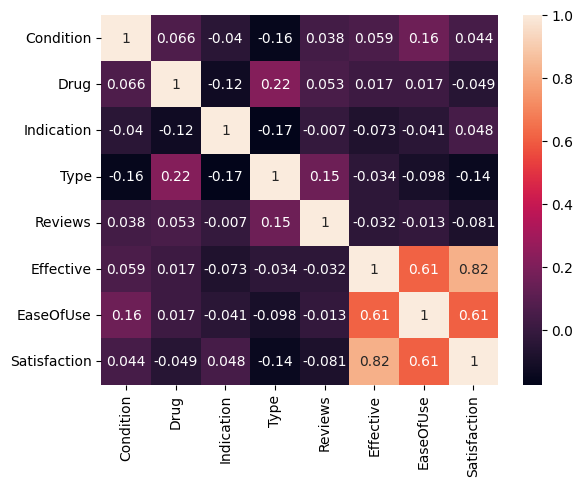

In [ ]:
sns.heatmap(data4.corr(),annot=True)

In [ ]:
# Satisfaction and Effective: high correlation

#### Histogram

<Axes: >

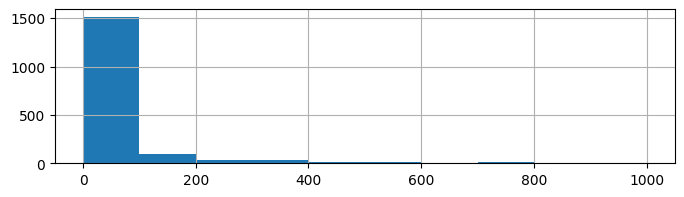

In [ ]:
data4['Reviews'].hist(range=(0,1000),figsize=(8,2))

In [ ]:
# reviews column is positively skewed
# it does not have high correlation with any column so no transformation required

<Axes: >

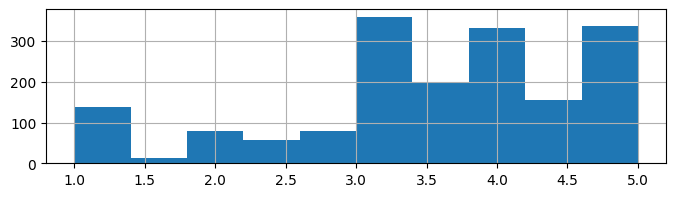

In [ ]:
data4['Effective'].hist(figsize=(8,2))

<Axes: >

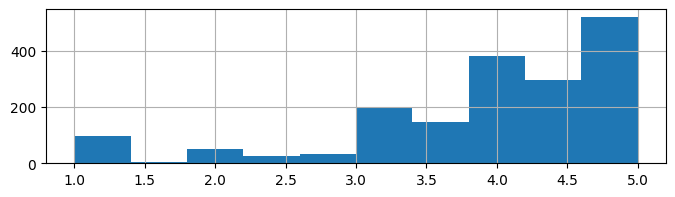

In [ ]:
data4['EaseOfUse'].hist(figsize=(8,2))

In [ ]:
# EaseOfUse: negatively skewed

<Axes: >

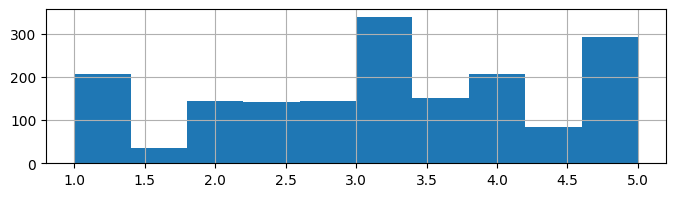

In [ ]:
data4['Satisfaction'].hist(figsize=(8,2))

#### Boxplot

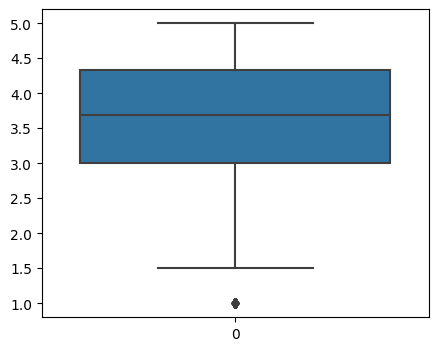

In [ ]:
plt.figure(figsize=(5,4))
sns.boxplot(data4['Effective'])
plt.show()
# outliers present

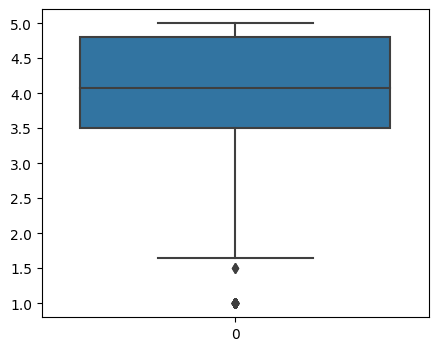

In [ ]:
plt.figure(figsize=(5,4))
sns.boxplot(data4['EaseOfUse'])
plt.show()
# outliers present

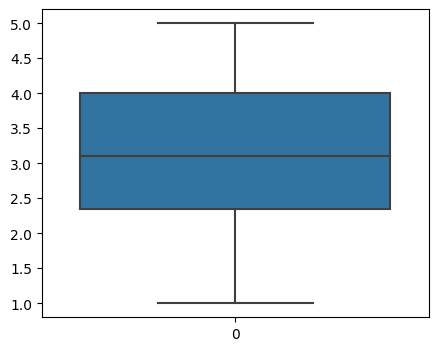

In [ ]:
plt.figure(figsize=(5,4))
sns.boxplot(data4['Satisfaction'])
plt.show()

#### Pairplot

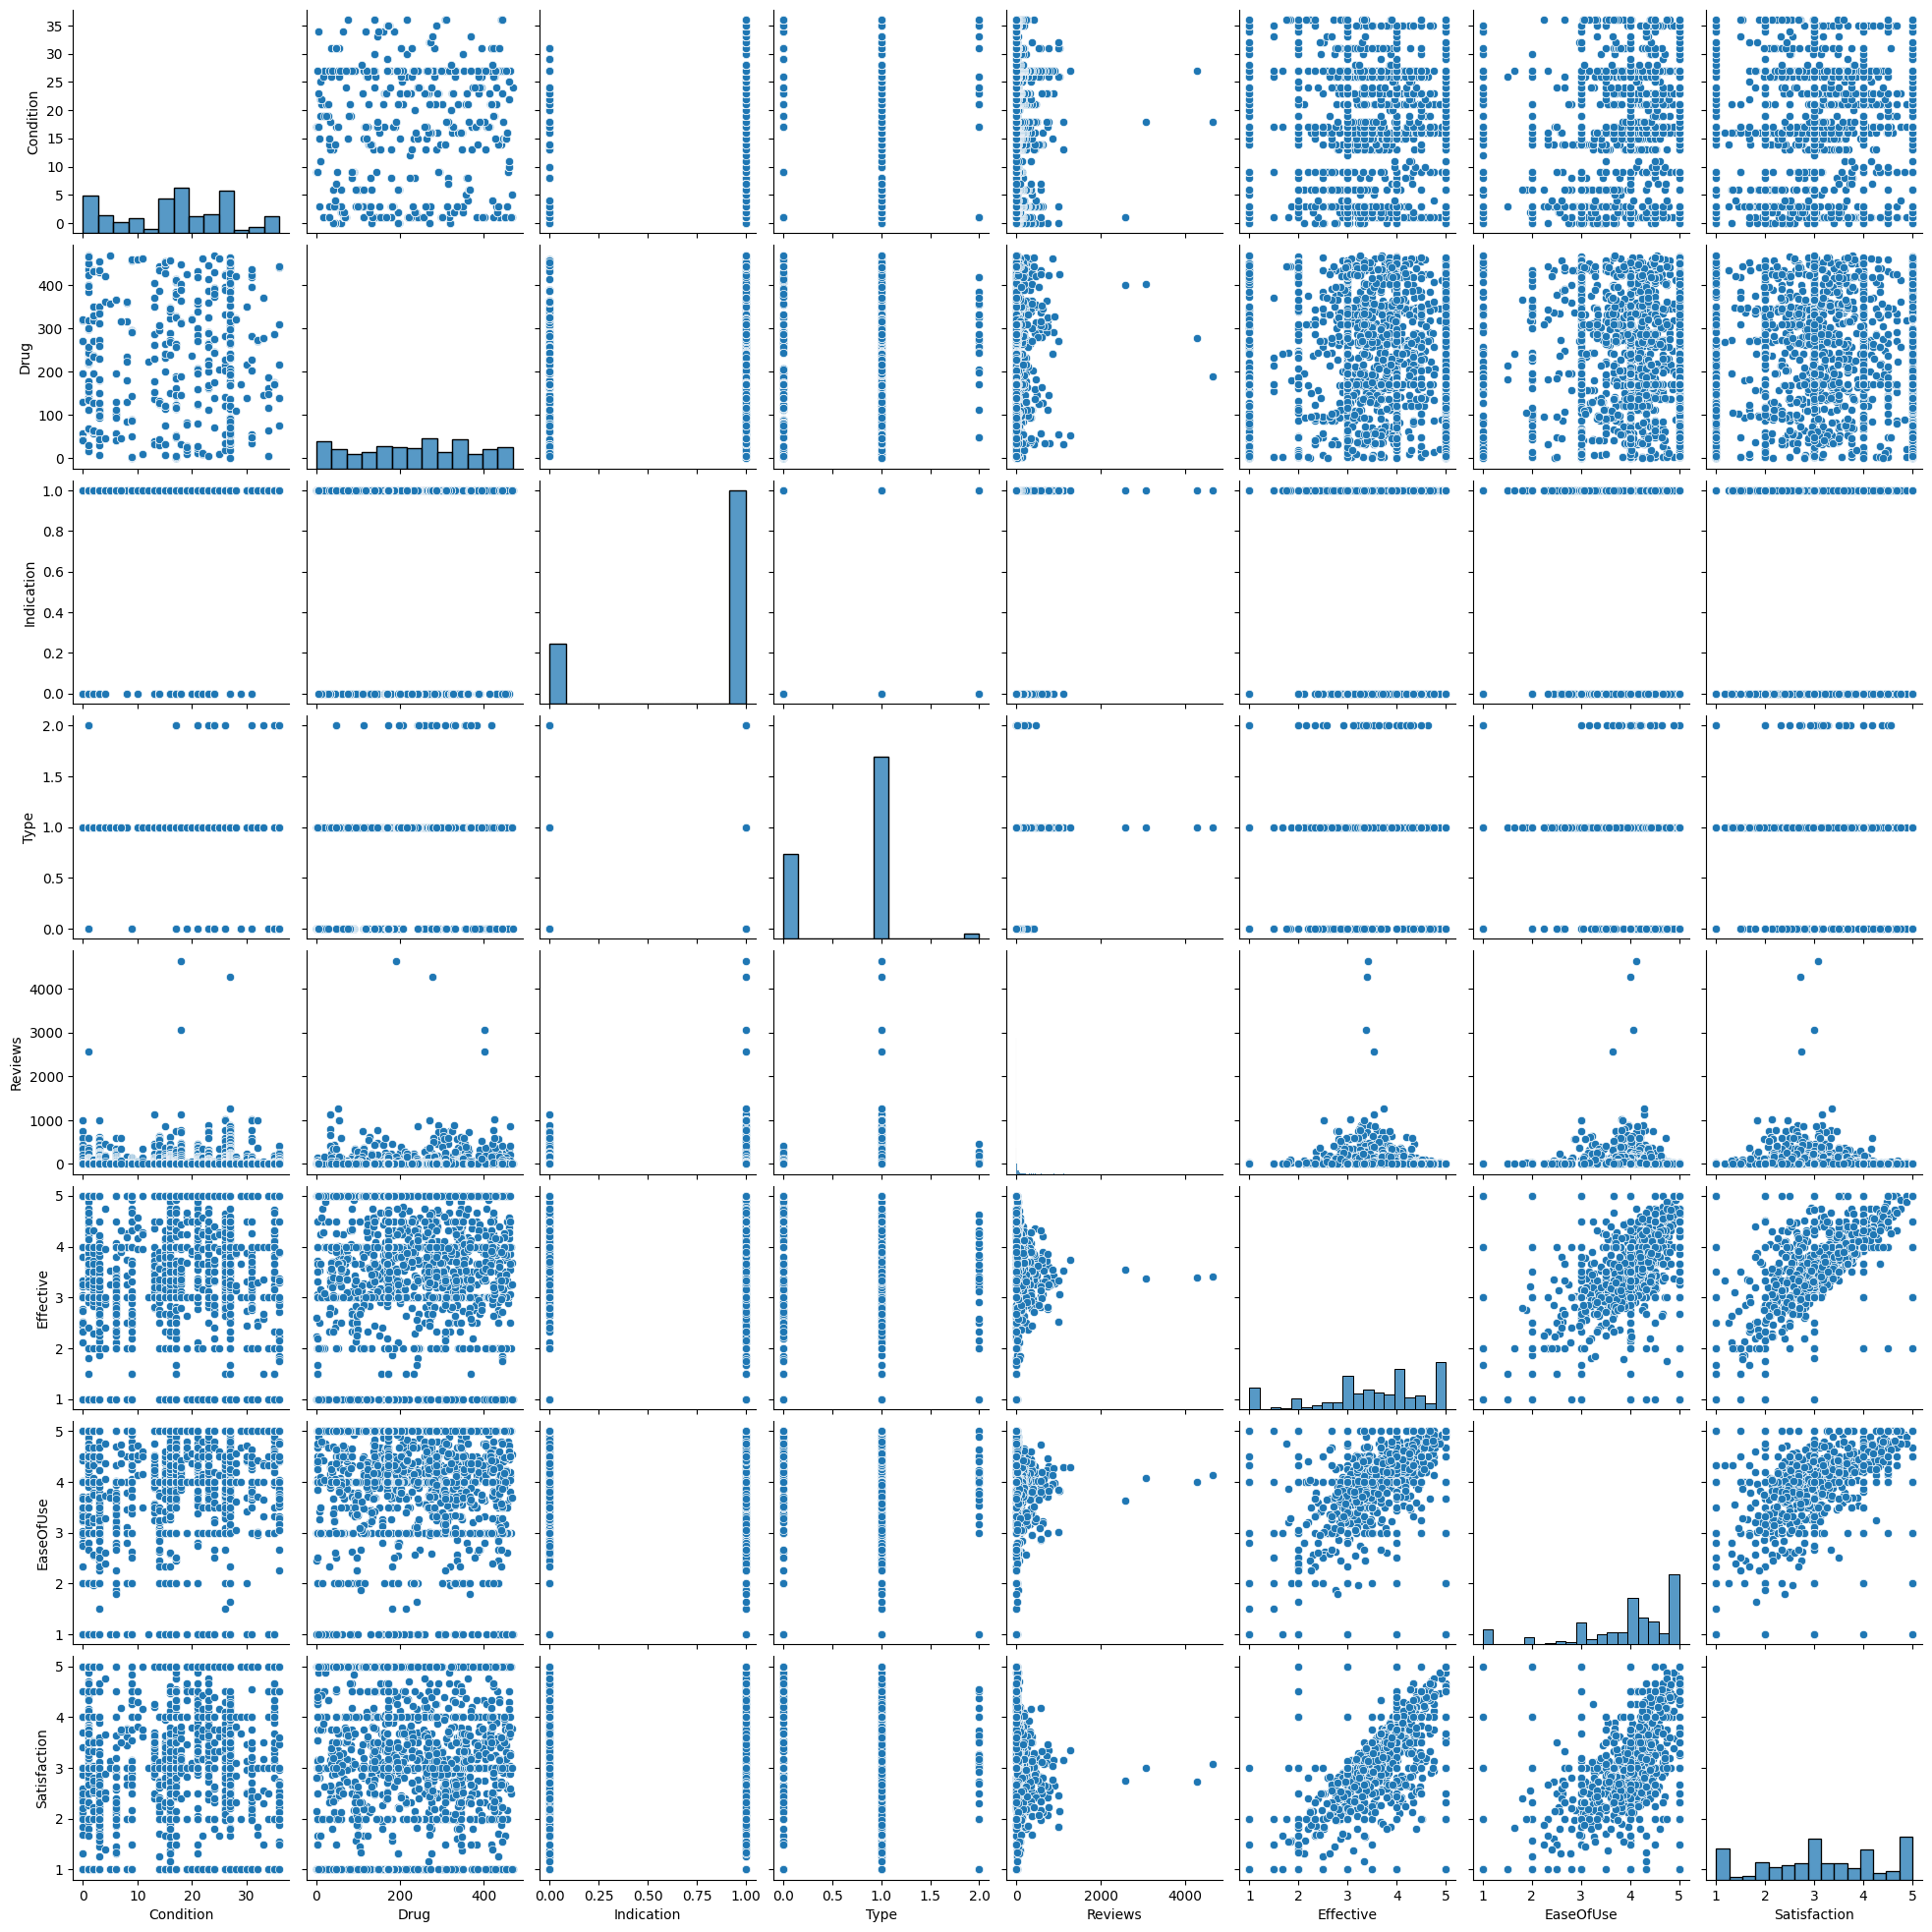

In [ ]:
sns.pairplot(data4)

#### Distplot

<ipython-input-42-3a9f06b61b27>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data4['Effective'])


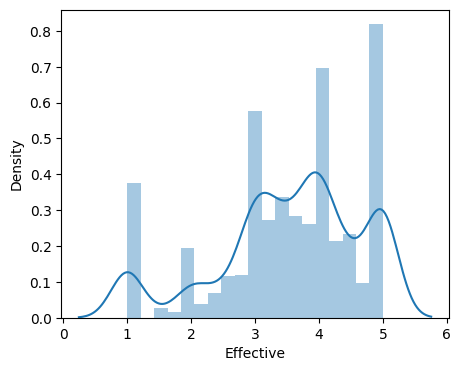

In [ ]:
plt.figure(figsize=(5,4))
sns.distplot(data4['Effective'])
plt.show()

<ipython-input-43-e84811dd59c5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data4['Reviews'])


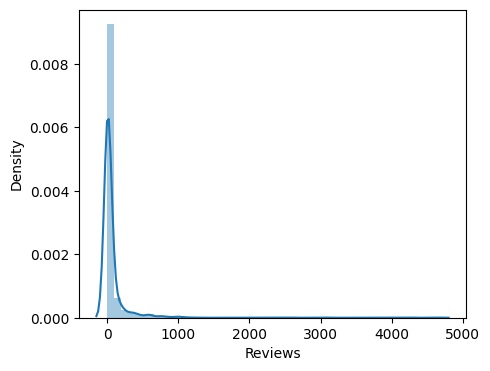

In [ ]:
plt.figure(figsize=(5,4))
sns.distplot(data4['Reviews'])
plt.show()

In [ ]:
data4['Reviews'].unique()

array([ 994,  755,  584,  437,  361,  353,  222,  140,   72,   43,   40,
         23,   20,   19,   15,   13,   12,   11,   10,    5,    4,    3,
          2,    1,  156,   33,   29,   27,   26,   17, 2575,  586,  364,
        321,  235,  151,  129,  118,  113,  104,   89,   79,   68,   59,
         57,   54,   47,   41,   38,   34,   32,   31,   28,   24,   22,
         21,   18,   16,   14,    9,    8,    7,    6,  135,  127,   92,
         71,   93,   36,  627,  580,  573,  538,  466,  348,  285,  257,
        256,  239,  226,  204,  203,  144,  138,  125,  112,   97,   52,
         37,   30,   25,  350,  146, 1126,  452,  409,  241,  139,  120,
        103,   88,   58,   53,   48,  629,  562,   39,  853,  378,  224,
        196,  155,   95,   74,   70,  619,  450,  359,  357,  246,  211,
        207,  191,  180,  166,  154,  133,   99,   98,   96,   82,   81,
         80,   77,   76,   67,   66,   64,   62,   60,   51,   46,   42,
         35,  740,  315,  271,  186,   55, 4647, 30

<ipython-input-45-bbae9ce31a0f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data4['Satisfaction'])


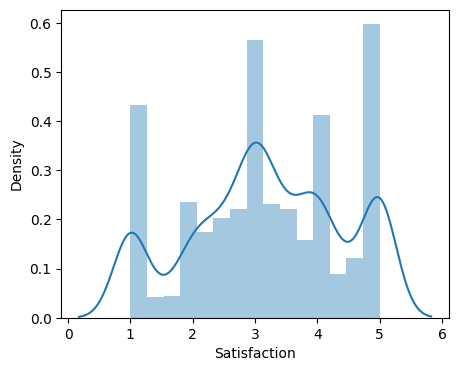

In [ ]:
plt.figure(figsize=(5,4))
sns.distplot(data4['Satisfaction'])
plt.show()

<ipython-input-46-27fbc125dde2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data4['EaseOfUse'])


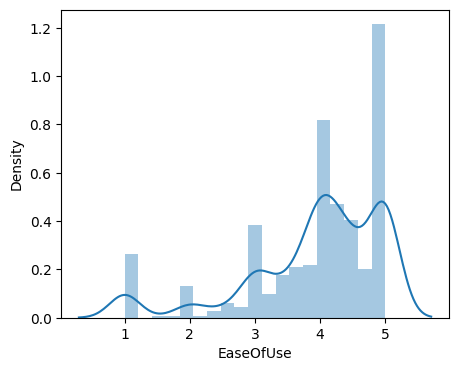

In [ ]:
plt.figure(figsize=(5,4))
sns.distplot(data4['EaseOfUse'])
plt.show()
# skewness present

## Transformation

In [ ]:
# skewness in EaseOfUse: using log transfromation

In [ ]:
from sklearn.preprocessing import FunctionTransformer
trf=FunctionTransformer(func=np.log1p)
data4['EaseOfUse']=trf.fit_transform(data4['EaseOfUse'])
data4.head()

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction
0,0,271,1,1,994,2.52,1.388791,1.84
1,0,319,1,1,755,2.78,1.386294,2.08
2,0,58,1,1,584,3.21,1.611436,2.57
3,0,42,1,1,437,3.26,1.442202,2.42
4,0,271,1,1,361,2.44,1.376244,1.68


<ipython-input-50-7205e0d7aa24>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data4['EaseOfUse'])


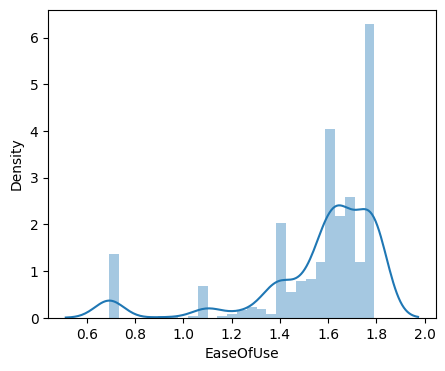

In [ ]:
plt.figure(figsize=(5,4))
sns.distplot(data4['EaseOfUse'])
plt.show()

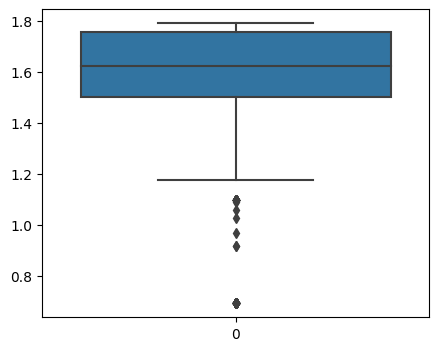

In [ ]:
plt.figure(figsize=(5,4))
sns.boxplot(data4['EaseOfUse'])
plt.show()

 ## Outliers

In [ ]:
data4.head(1)

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction
0,0,271,1,1,994,2.52,1.388791,1.84


In [ ]:
# from boxplot: EaseOfUse & Effective column: outliers present
# from distplot: Reviews column: outliers present

#### 1) Effective column

In [ ]:
# lower outliers present
# Q3= 4.33, Q1= 3.00, IQR= Q3-Q1 ( from .describe())

In [ ]:
IQR_1=4.33-3.00
IQR_1

1.33

In [ ]:
4.33-(1.5*IQR_1)

2.335

In [ ]:
val_1=data4['Effective']<2.335

In [ ]:
val_1.value_counts()

False    1499
True      254
Name: Effective, dtype: int64

In [ ]:
filtered_val1=val_1[val_1==True]
print(filtered_val1)

8       True
18      True
20      True
23      True
31      True
        ... 
1736    True
1741    True
1742    True
1744    True
1752    True
Name: Effective, Length: 254, dtype: bool


In [ ]:
# replacing True values with na
data4.loc[val_1==True,'Effective']=np.nan
data4.head(30)

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction
0,0,271,1,1,994,2.52,1.388791,1.84
1,0,319,1,1,755,2.78,1.386294,2.08
2,0,58,1,1,584,3.21,1.611436,2.57
3,0,42,1,1,437,3.26,1.442202,2.42
4,0,271,1,1,361,2.44,1.376244,1.68
5,0,41,1,1,353,3.04,1.474763,2.34
6,0,131,1,1,222,3.00,1.481605,2.18
7,0,42,1,1,140,2.74,1.396245,2.12
8,0,195,1,1,72,NaN,1.332366,1.32
9,0,42,0,1,43,3.29,1.497388,2.59


#### 2) Reviews column

In [ ]:
# Q3=30.00, Q1=2.00

In [ ]:
IQR_2=30.00-2.00
IQR_2

28.0

In [ ]:
30.00+(1.5*IQR_2)

72.0

In [ ]:
val_2=data4['Reviews']>72.0

In [ ]:
val_2.value_counts()

False    1472
True      281
Name: Reviews, dtype: int64

In [ ]:
filtered_val2=val_2[val_2==True]
print(filtered_val2)

0       True
1       True
2       True
3       True
4       True
        ... 
1727    True
1728    True
1729    True
1730    True
1731    True
Name: Reviews, Length: 281, dtype: bool


In [ ]:
# replacing True values with na
data4.loc[val_2==True,'Reviews']=np.nan
data4.head(30)

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction
0,0,271,1,1,NaN,2.52,1.388791,1.84
1,0,319,1,1,NaN,2.78,1.386294,2.08
2,0,58,1,1,NaN,3.21,1.611436,2.57
3,0,42,1,1,NaN,3.26,1.442202,2.42
4,0,271,1,1,NaN,2.44,1.376244,1.68
5,0,41,1,1,NaN,3.04,1.474763,2.34
6,0,131,1,1,NaN,3.00,1.481605,2.18
7,0,42,1,1,NaN,2.74,1.396245,2.12
8,0,195,1,1,72.0,NaN,1.332366,1.32
9,0,42,0,1,43.0,3.29,1.497388,2.59


#### 3) EaseOfUse column

In [ ]:
# Q3= 1.757858, Q1=1.504077

In [ ]:
IQR_3=1.757858-1.504077
IQR_3

0.2537809999999998

In [ ]:
1.757858-(1.5*IQR_3)

1.3771865

In [ ]:
val_3=data4['EaseOfUse']<1.3771865
val_3.value_counts()

False    1546
True      207
Name: EaseOfUse, dtype: int64

In [ ]:
filtered_val3=val_3[val_3==True]
print(filtered_val3)

4       True
8       True
16      True
17      True
20      True
        ... 
1662    True
1711    True
1723    True
1740    True
1742    True
Name: EaseOfUse, Length: 207, dtype: bool


In [ ]:
# replacing True values with na
data4.loc[val_3==True,'EaseOfUse']=np.nan
data4.head(30)

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction
0,0,271,1,1,NaN,2.52,1.388791,1.84
1,0,319,1,1,NaN,2.78,1.386294,2.08
2,0,58,1,1,NaN,3.21,1.611436,2.57
3,0,42,1,1,NaN,3.26,1.442202,2.42
4,0,271,1,1,NaN,2.44,NaN,1.68
5,0,41,1,1,NaN,3.04,1.474763,2.34
6,0,131,1,1,NaN,3.00,1.481605,2.18
7,0,42,1,1,NaN,2.74,1.396245,2.12
8,0,195,1,1,72.0,NaN,NaN,1.32
9,0,42,0,1,43.0,3.29,1.497388,2.59


In [ ]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1753 entries, 0 to 1752
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Condition     1753 non-null   int64  
 1   Drug          1753 non-null   int64  
 2   Indication    1753 non-null   int64  
 3   Type          1753 non-null   int64  
 4   Reviews       1472 non-null   float64
 5   Effective     1499 non-null   float64
 6   EaseOfUse     1546 non-null   float64
 7   Satisfaction  1753 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 109.7 KB


In [ ]:
# Effective: mean: 3.54
# Reviews: mean: 64.50
# EaseOfUse: mean: 1.567028

In [ ]:
# mean imputation on Effective column
data4['Effective']=data4['Effective'].fillna(3.54)

# mean imputation on Reviews column
data4['Reviews']=data4['Reviews'].fillna(64.50)

# mean imputation on log_EaseOfUse column
data4['EaseOfUse']=data4['EaseOfUse'].fillna(1.567028)

In [ ]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1753 entries, 0 to 1752
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Condition     1753 non-null   int64  
 1   Drug          1753 non-null   int64  
 2   Indication    1753 non-null   int64  
 3   Type          1753 non-null   int64  
 4   Reviews       1753 non-null   float64
 5   Effective     1753 non-null   float64
 6   EaseOfUse     1753 non-null   float64
 7   Satisfaction  1753 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 109.7 KB


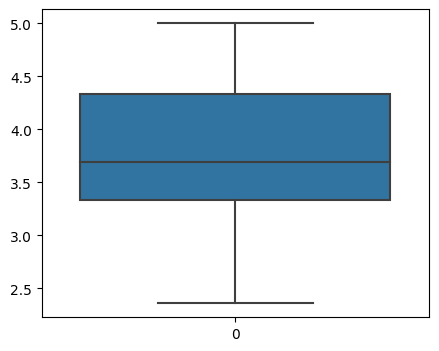

In [ ]:
plt.figure(figsize=(5,4))
sns.boxplot(data4['Effective'])
plt.show()
# no outliers

<ipython-input-84-e84811dd59c5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data4['Reviews'])


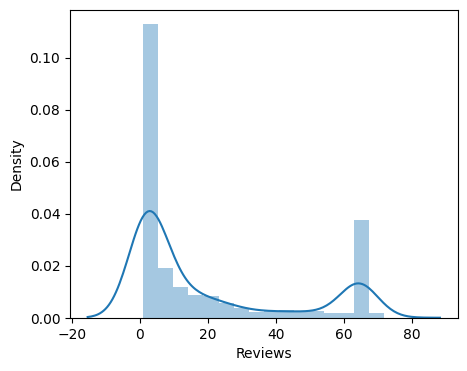

In [ ]:
plt.figure(figsize=(5,4))
sns.distplot(data4['Reviews'])
plt.show()

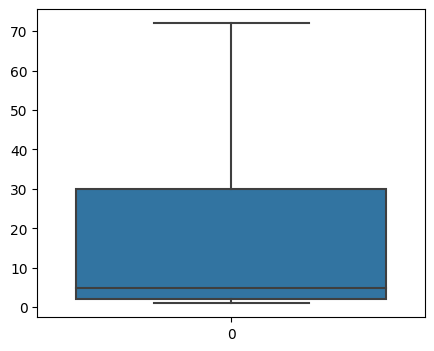

In [ ]:
plt.figure(figsize=(5,4))
sns.boxplot(data4['Reviews'])
plt.show()
# no outliers

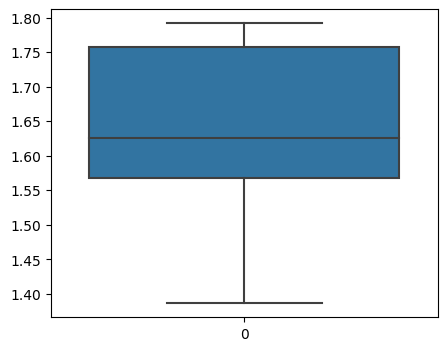

In [ ]:
plt.figure(figsize=(5,4))
sns.boxplot(data4['EaseOfUse'])
plt.show()
# no outliers

<ipython-input-87-7205e0d7aa24>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data4['EaseOfUse'])


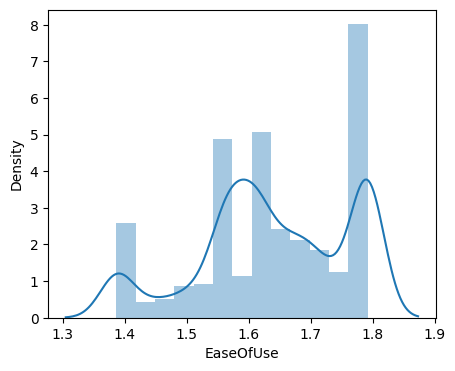

In [ ]:
plt.figure(figsize=(5,4))
sns.distplot(data4['EaseOfUse'])
plt.show()

## Standardization

In [ ]:
data4.head(1)

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction
0,0,271,1,1,64.5,2.52,1.388791,1.84


In [ ]:
sc = StandardScaler
scaler=sc().fit_transform(data4)

In [ ]:
scaled_data=pd.DataFrame(scaler,columns=data4.columns)
scaled_data.head()

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction
0,-1.645435,0.282554,0.529619,0.592003,1.864792,-1.877315,-2.068585,-1.093333
1,-1.645435,0.635437,0.529619,0.592003,1.864792,-1.508268,-2.089219,-0.897473
2,-1.645435,-1.283368,0.529619,0.592003,1.864792,-0.897921,-0.228634,-0.497592
3,-1.645435,-1.400996,0.529619,0.592003,1.864792,-0.826951,-1.627195,-0.620005
4,-1.645435,0.282554,0.529619,0.592003,1.864792,-1.990868,-0.595624,-1.223906


## Splitting Data

In [ ]:
scaled_data.head(1)

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction
0,-1.645435,0.282554,0.529619,0.592003,1.864792,-1.877315,-2.068585,-1.093333


In [ ]:
x=scaled_data.iloc[:,[0,2,3,4,5,6]]
x.head(1)
# dropping Drug column

,Condition,Indication,Type,Reviews,Effective,EaseOfUse
0,-1.645435,0.529619,0.592003,1.864792,-1.877315,-2.068585


In [ ]:
y=scaled_data['Satisfaction']
y.head()

0   -1.093333
1   -0.897473
2   -0.497592
3   -0.620005
4   -1.223906
Name: Satisfaction, dtype: float64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
x_train.shape, x_test.shape    # 30% data in test

((1402, 6), (351, 6))

In [ ]:
y_train.shape, y_test.shape

((1402,), (351,))

## Building Model

#### 1) Linear Regression

In [ ]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)
y_pred_lr=lr_model.predict(x_test)

# Evaluation mertrics
mse_lr=mean_squared_error(y_test,y_pred_lr)
rmse_lr=np.sqrt(mse_lr)
mae_lr=mean_absolute_error(y_test,y_pred_lr)
r2_lr=r2_score(y_test,y_pred_lr)

# Printing metrics
print("Linear Regression Metrics:")
print(f"MSE: {mse_lr}")
print(f"RMSE: {rmse_lr}")
print(f"MAE: {mae_lr}")
print(f"R2 Score: {r2_lr}")

Linear Regression Metrics:
MSE: 0.5953764238719452
RMSE: 0.7716063918034539
MAE: 0.576542062178274
R2 Score: 0.4350209914352575


In [ ]:
print(f"lr_coef: {lr_model.coef_}")
print(f"lr_intercept: {lr_model.intercept_}")

lr_coef: [ 0.01248495  0.10089482 -0.06022264  0.09867142  0.57740566  0.17348751]
lr_intercept: 0.014934979797726426


#### 2) Linear Regression with KFold

In [ ]:
kf=KFold(n_splits=7,shuffle=True)
results1=cross_val_score(lr_model,x,y,cv=kf)
print(results1.mean())     # mean of 10 accuracies

0.4552565898614631


#### 3) Decision Tree

In [ ]:
dt_model=DecisionTreeRegressor(splitter='best',max_depth=3)
dt_model.fit(x_train,y_train)
y_pred_dt=dt_model.predict(x_test)

accuracy_dt=dt_model.score(x_test,y_test)

# Evaluation mertrics
mse_dt=mean_squared_error(y_test,y_pred_dt)
rmse_dt=np.sqrt(mse_dt)
mae_dt=mean_absolute_error(y_test,y_pred_dt)
r2_dt=r2_score(y_test,y_pred_dt)
# Printing metrics
print("Decision Tree Metrics:")
print(f"MSE: {mse_dt}")
print(f"RMSE: {rmse_dt}")
print(f"MAE: {mae_dt}")
print(f"R2 Score: {r2_dt}")
print(f"Accuracy: {accuracy_dt}")

Decision Tree Metrics:
MSE: 0.32744731535449695
RMSE: 0.5722301244730977
MAE: 0.39863042648222763
R2 Score: 0.6892707669157544
Accuracy: 0.6892707669157544


#### 4) Decision Tree with KFold

In [ ]:
kf=KFold(n_splits=10,shuffle=True)
results2=cross_val_score(dt_model,x,y,cv=kf)
print(results2.mean())

0.6551183715867933


#### 5) Bagging

In [ ]:
# bagging

bag_model=BaggingRegressor(n_estimators=75)
bag_model.fit(x_train,y_train)
y_pred_bag=bag_model.predict(x_test)

accuracy_bag=bag_model.score(x_test,y_test)

# Evaluation mertrics
mse_bag=mean_squared_error(y_test,y_pred_bag)
rmse_bag=np.sqrt(mse_bag)
mae_bag=mean_absolute_error(y_test,y_pred_bag)
r2_bag=r2_score(y_test,y_pred_bag)
# Printing metrics
print("Bagging Metrics:")
print(f"MSE: {mse_bag}")
print(f"RMSE: {rmse_bag}")
print(f"MAE: {mae_bag}")
print(f"R2 Score: {r2_bag}")
print(f"Accuracy: {accuracy_bag}")

Bagging Metrics:
MSE: 0.3136450761448036
RMSE: 0.5600402451117273
MAE: 0.36649407931028183
R2 Score: 0.702368321860831
Accuracy: 0.702368321860831


#### 6) Bagging with KFold

In [ ]:
kf=KFold(n_splits=8,shuffle=True)
results4=cross_val_score(bag_model,x,y,cv=kf)
print(results4.mean())

0.6490901388331441


#### 7) AdaBoost

In [ ]:
# AdaBoost
ada_model = AdaBoostRegressor(n_estimators=5)
ada_model.fit(x_train,y_train)
y_pred_ada=ada_model.predict(x_test)

accuracy_ada=ada_model.score(x_test,y_test)

# Evaluation mertrics
mse_ada=mean_squared_error(y_test,y_pred_ada)
rmse_ada=np.sqrt(mse_ada)
mae_ada=mean_absolute_error(y_test,y_pred_ada)
r2_ada=r2_score(y_test,y_pred_ada)
# Printing metrics
print("AdaBoost Metrics:")
print(f"MSE: {mse_ada}")
print(f"RMSE: {rmse_ada}")
print(f"MAE: {mae_ada}")
print(f"R2 Score: {r2_ada}")
print(f"Accuracy: {accuracy_ada}")

AdaBoost Metrics:
MSE: 0.33130523291193664
RMSE: 0.5755912029487045
MAE: 0.4300262053655189
R2 Score: 0.6856098183975853
Accuracy: 0.6856098183975853


#### 8) AdaBoost with KFold

In [ ]:
# kfold
kf=KFold(n_splits=9,shuffle=True)
results6=cross_val_score(ada_model,x,y,cv=kf)
print(results6.mean())

0.6402689240767702


#### 9) Random Forest

In [ ]:
# RandomForest
rf_model=RandomForestRegressor(n_estimators=60,max_features=3,max_depth=5)
rf_model.fit(x_train,y_train)
y_pred_rf=rf_model.predict(x_test)

accuracy_rf=rf_model.score(x_test,y_test)

# Evaluation mertrics
mse_rf=mean_squared_error(y_test,y_pred_rf)
rmse_rf=np.sqrt(mse_rf)
mae_rf=mean_absolute_error(y_test,y_pred_rf)
r2_rf=r2_score(y_test,y_pred_rf)
# Printing metrics
print("RandomForest Metrics:")
print(f"MSE: {mse_rf}")
print(f"RMSE: {rmse_rf}")
print(f"MAE: {mae_rf}")
print(f"R2 Score: {r2_rf}")
print(f"Accuracy: {accuracy_rf}")

RandomForest Metrics:
MSE: 0.29110047514872356
RMSE: 0.5395372787386646
MAE: 0.38339757885820286
R2 Score: 0.723761890380757
Accuracy: 0.723761890380757


#### 10) Random Forest with KFold

In [ ]:
# kfold
kf=KFold(n_splits=10,shuffle=True)
results7=cross_val_score(rf_model,x,y,cv=kf)
print(results7.mean())

0.7041056256287713


#### 11) Stacking

In [ ]:
# sub models
estimators=[]
model1=LinearRegression()
estimators.append(('linear',model1))
model2=DecisionTreeRegressor(splitter='best',max_depth=4)
estimators.append(('cart',model2))
model3=SVR()
estimators.append(('svm',model3))

# creating ensemble model
ensemble=VotingRegressor(estimators)
ensemble.fit(x_train,y_train)
y_pred_en=ensemble.predict(x_test)

accuracy_en=ensemble.score(x_test,y_test)

# Evaluation mertrics
mse_en=mean_squared_error(y_test,y_pred_en)
rmse_en=np.sqrt(mse_en)
mae_en=mean_absolute_error(y_test,y_pred_en)
r2_en=r2_score(y_test,y_pred_en)
# Printing metrics
print("Stacking Metrics:")
print(f"MSE: {mse_en}")
print(f"RMSE: {rmse_en}")
print(f"MAE: {mae_en}")
print(f"R2 Score: {r2_en}")
print(f"Accuracy: {accuracy_en}")

Stacking Metrics:
MSE: 0.41381655377362697
RMSE: 0.6432857481505609
MAE: 0.46147029787901656
R2 Score: 0.6073111784335822
Accuracy: 0.6073111784335822


#### 12) Stacking with KFold

In [ ]:
# kfold
kf=KFold(n_splits=10,shuffle=True)
results9=cross_val_score(ensemble,x,y,cv=kf)
print(results9.mean())

0.615706767034552


#### 13) XGBoost

In [ ]:
# xgb
xgb_model=XGBRegressor(n_estimators=90,max_depth=3)
xgb_model.fit(x_train,y_train)
y_pred_xgb=xgb_model.predict(x_test)

accuracy_xgb=xgb_model.score(x_test,y_test)

# Evaluation mertrics
mse_xgb=mean_squared_error(y_test,y_pred_xgb)
rmse_xgb=np.sqrt(mse_xgb)
mae_xgb=mean_absolute_error(y_test,y_pred_xgb)
r2_xgb=r2_score(y_test,y_pred_xgb)
# Printing metrics
print("XGB Metrics:")
print(f"MSE: {mse_xgb}")
print(f"RMSE: {rmse_xgb}")
print(f"MAE: {mae_xgb}")
print(f"R2 Score: {r2_xgb}")
print(f"Accuracy: {accuracy_xgb}")

XGB Metrics:
MSE: 0.2672300202754987
RMSE: 0.5169429565005201
MAE: 0.3371950694435868
R2 Score: 0.7464136202570557
Accuracy: 0.7464136202570557


#### 14) XGBoost with KFold

In [ ]:
# kfold
kf=KFold(n_splits=10,shuffle=True)
results11=cross_val_score(xgb_model,x,y,cv=kf)
print(results11.mean())

0.706369848119394


#### 15) LightGBM

In [ ]:
# lightgbm

lgb_model=lgb.LGBMRegressor(n_estimators=100,max_depth=5,num_leaves=50)
lgb_model.fit(x_train,y_train)
y_pred_lgb=lgb_model.predict(x_test)

accuracy_lgb=lgb_model.score(x_test,y_test)

# Evaluation mertrics
mse_lgb=mean_squared_error(y_test,y_pred_lgb)
rmse_lgb=np.sqrt(mse_lgb)
mae_lgb=mean_absolute_error(y_test,y_pred_lgb)
r2_lgb=r2_score(y_test,y_pred_lgb)
# Printing metrics
print("LGB Metrics:")
print(f"MSE: {mse_lgb}")
print(f"RMSE: {rmse_lgb}")
print(f"MAE: {mae_lgb}")
print(f"R2 Score: {r2_lgb}")
print(f"Accuracy: {accuracy_lgb}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 315
[LightGBM] [Info] Number of data points in the train set: 1402, number of used features: 6
[LightGBM] [Info] Start training from score 0.013944
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

#### 16) LightGBM with KFold

In [ ]:
# kfold
kf=KFold(n_splits=10,shuffle=True)
results13=cross_val_score(lgb_model,x,y,cv=kf)
print(results13.mean())

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 337
[LightGBM] [Info] Number of data points in the train set: 1577, number of used features: 6
[LightGBM] [Info] Start training from score 0.002351
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

#### 18) Gradient Boosting

In [ ]:
# gradient boosting
gb_model=GradientBoostingRegressor(n_estimators=100)
gb_model.fit(x_train,y_train)
y_pred_gb=gb_model.predict(x_test)

accuracy_gb=gb_model.score(x_test,y_test)

# Evaluation mertrics
mse_gb=mean_squared_error(y_test,y_pred_gb)
rmse_gb=np.sqrt(mse_gb)
mae_gb=mean_absolute_error(y_test,y_pred_gb)
r2_gb=r2_score(y_test,y_pred_gb)
# Printing metrics
print("GB Metrics:")
print(f"MSE: {mse_gb}")
print(f"RMSE: {rmse_gb}")
print(f"MAE: {mae_gb}")
print(f"R2 Score: {r2_gb}")
print(f"Accuracy: {accuracy_gb}")

GB Metrics:
MSE: 0.2643585740048582
RMSE: 0.5141581215976834
MAE: 0.3394183746662988
R2 Score: 0.7491384625620011
Accuracy: 0.7491384625620011


#### 19) Gradient Boosting with KFold

In [ ]:
# kfold
kf=KFold(n_splits=8,shuffle=True)
results15=cross_val_score(gb_model,x,y,cv=kf)
print(results15.mean())

0.7260217676466607


#### 20) Elastic Net

In [ ]:
# Elastic Net
enet=ElasticNet(alpha=0.01,l1_ratio=0.5)
enet.fit(x_train,y_train)
y_pred_enet=enet.predict(x_test)

accuracy_enet=enet.score(x_test,y_test)

# Evaluation mertrics
mse_enet=mean_squared_error(y_test,y_pred_enet)
rmse_enet=np.sqrt(mse_enet)
mae_enet=mean_absolute_error(y_test,y_pred_enet)
r2_enet=r2_score(y_test,y_pred_enet)
# Printing metrics
print("ENet Metrics:")
print(f"MSE: {mse_enet}")
print(f"RMSE: {rmse_enet}")
print(f"MAE: {mae_enet}")
print(f"R2 Score: {r2_enet}")
print(f"Accuracy: {accuracy_enet}")

ENet Metrics:
MSE: 0.5947704876710106
RMSE: 0.7712136459315347
MAE: 0.5767349345758951
R2 Score: 0.43559599108309566
Accuracy: 0.43559599108309566


#### 21) Elastic Net with KFold

In [ ]:
# kfold
kf=KFold(n_splits=10,shuffle=True)
results16=cross_val_score(enet,x,y,cv=kf)
print(results16.mean())

0.45777621446004424


#### 22) Support Vector Machine

In [ ]:
# SVM
from sklearn.svm import SVR
svm=SVR()
svm.fit(x_train,y_train)
y_pred_svm=svm.predict(x_test)

accuracy_svm=svm.score(x_test,y_test)

# Evaluation mertrics
mse_svm=mean_squared_error(y_test,y_pred_svm)
rmse_svm=np.sqrt(mse_svm)
mae_svm=mean_absolute_error(y_test,y_pred_svm)
r2_svm=r2_score(y_test,y_pred_svm)
# Printing metrics
print("SVM Metrics:")
print(f"MSE: {mse_svm}")
print(f"RMSE: {rmse_svm}")
print(f"MAE: {mae_svm}")
print(f"R2 Score: {r2_svm}")
print(f"Accuracy: {accuracy_svm}")

SVM Metrics:
MSE: 0.5419145041403293
RMSE: 0.7361484253466344
MAE: 0.4976292410146733
R2 Score: 0.4857533704728808
Accuracy: 0.4857533704728808


#### 23) SVM with KFold

In [ ]:
# kfold
kf=KFold(n_splits=10,shuffle=True)
results17=cross_val_score(svm,x,y,cv=kf)
print(results17.mean())

0.5261269530881986


## Graph

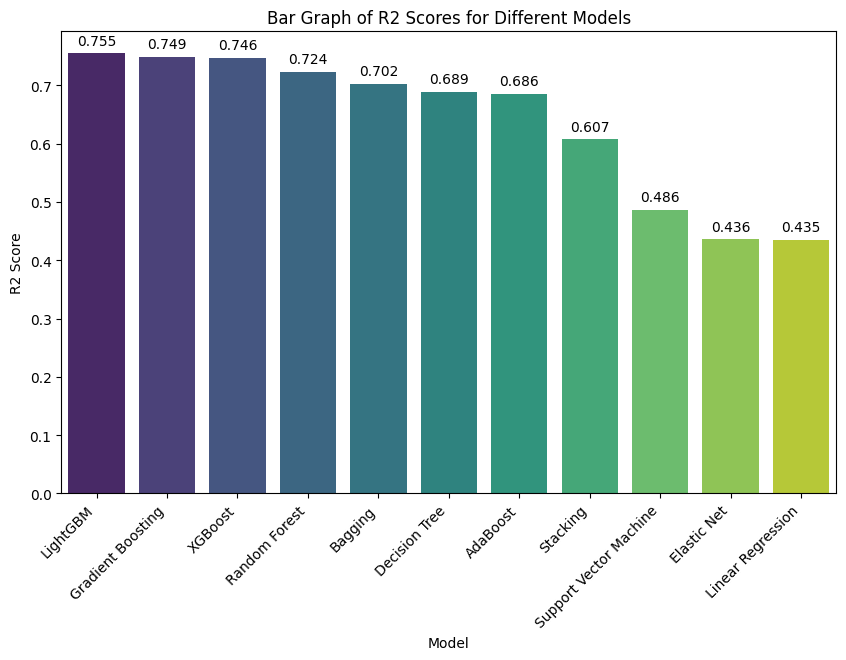

In [ ]:
# Dictionary to store models
models = {
    'Linear Regression': (lr_model,y_pred_lr),
    'Decision Tree': (dt_model,y_pred_dt),
    'Bagging': (bag_model,y_pred_bag),
    'AdaBoost': (ada_model,y_pred_ada),
    'Random Forest': (rf_model,y_pred_rf),
    'Stacking': (ensemble,y_pred_en),
    'XGBoost': (xgb_model,y_pred_xgb),
    'LightGBM': (lgb_model,y_pred_lgb),
    'Gradient Boosting': (gb_model,y_pred_gb),
    'Elastic Net': (enet,y_pred_enet),
    'Support Vector Machine': (svm,y_pred_svm),
}

# List to store R2 scores
r2_scores = []

# Evaluate and print metrics for each model
for model_name, (model, y_pred) in models.items():
    r2 = r2_score(y_test, y_pred)

    # Append model and R2 score to the list
    r2_scores.append((model_name, r2))

# Sort models based on R2 score
sorted_models = sorted(r2_scores, key=lambda x: x[1], reverse=True)

# Bar graph for R2 scores with labels
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=[model[0] for model in sorted_models], y=[model[1] for model in sorted_models], palette="viridis")
plt.title("Bar Graph of R2 Scores for Different Models")
plt.xlabel("Model")
plt.ylabel("R2 Score")
plt.xticks(rotation=45, ha="right")

# Add R2 score labels on top of each bar
for index, value in enumerate(sorted_models):
    bar_plot.text(index, value[1] + 0.01, f"{value[1]:.3f}", ha='center', va='bottom', fontsize=10)

plt.show()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 334
[LightGBM] [Info] Number of data points in the train set: 1577, number of used features: 6
[LightGBM] [Info] Start training from score -0.010297
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

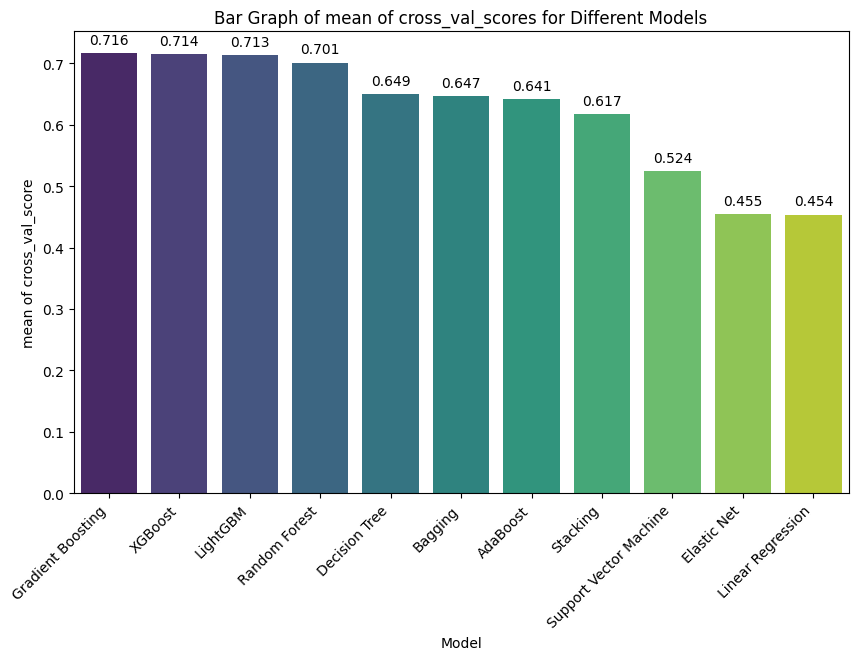

In [ ]:
models_kf = {
    'Linear Regression': (lr_model),
    'Decision Tree': (dt_model),
    'Bagging': (bag_model),
    'AdaBoost': (ada_model),
    'Random Forest': (rf_model),
    'Stacking': (ensemble),
    'XGBoost': (xgb_model),
    'LightGBM': (lgb_model),
    'Gradient Boosting': (gb_model),
    'Elastic Net': (enet),
    'Support Vector Machine': (svm),
}

# List to store mean of cross val scores
results= []

# Evaluate and print metrics for each model
for model_name,(model) in models_kf.items():
    result = cross_val_score(model,x,y,cv=kf).mean()

    # Append model and R2 score to the list
    results.append((model_name,result))

# Sort models based on R2 score
sorted_models = sorted(results, key=lambda x: x[1], reverse=True)

# Bar graph for results with labels
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=[model[0] for model in sorted_models], y=[model[1] for model in sorted_models], palette="viridis")
plt.title("Bar Graph of mean of cross_val_scores for Different Models")
plt.xlabel("Model")
plt.ylabel("mean of cross_val_score")
plt.xticks(rotation=45, ha="right")

# Add results labels on top of each bar
for index, value in enumerate(sorted_models):
    bar_plot.text(index, value[1]+ 0.01 , f"{value[1]:.3f}", ha='center', va='bottom', fontsize=10)

plt.show()


In [ ]:

modelsummary_data= [['Linear Regression', r2_lr*100],
         ['Decision Tree', r2_dt*100],
          ['Bagging', r2_bag*100],
        ['AdaBoost', r2_ada*100],
        ['Random Forest', r2_rf*100],
        ['Stacking', r2_en*100],
        ['XGBoost', r2_xgb*100],
        ['Lightgbm', r2_lgb*100],
        ['Gradient Boosting',r2_gb*100],
        ['Elastic Net', r2_enet*100],
        ['Support Vector Machine', r2_svm*100],
     ['Linear Regression with KFold', results1.mean()*100 ],
         ['Decision Tree with KFold', results2.mean()*100],
          ['Bagging with KFold',results4.mean()*100 ],
        ['AdaBoost with KFold', results6.mean()*100],
        ['Random Forest with KFold', results7.mean()*100],
        ['Stacking with KFold', results9.mean()*100],
        ['XGBoost with KFold', results11.mean()*100],
        ['Lightgbm with KFold', results13.mean()*100],
        ['Gradient Boosting with KFold', results15.mean()*100],
        ['Elastic Net with KFold', results16.mean()*100],
        ['Support Vector Machine with KFold', results17.mean()*100]   ]


df_model_summary= pd.DataFrame(modelsummary_data, columns=['Model', 'Accuracy'])


print(df_model_summary)

                                Model   Accuracy
0                   Linear Regression  43.502099
1                       Decision Tree  68.927077
2                             Bagging  70.236832
3                            AdaBoost  68.560982
4                       Random Forest  72.376189
5                            Stacking  60.731118
6                             XGBoost  74.641362
7                            Lightgbm  75.491905
8                   Gradient Boosting  74.913846
9                         Elastic Net  43.559599
10             Support Vector Machine  48.575337
11       Linear Regression with KFold  45.525659
12           Decision Tree with KFold  65.511837
13                 Bagging with KFold  64.909014
14                AdaBoost with KFold  64.026892
15           Random Forest with KFold  70.410563
16                Stacking with KFold  61.570677
17                 XGBoost with KFold  70.636985
18                Lightgbm with KFold  71.224317
19       Gradient Bo

In [ ]:
modelsummary=df_model_summary.sort_values(by=['Accuracy'], ascending=False)
modelsummary

,Model,Accuracy
7,Lightgbm,75.491905
8,Gradient Boosting,74.913846
6,XGBoost,74.641362
19,Gradient Boosting with KFold,72.602177
4,Random Forest,72.376189
18,Lightgbm with KFold,71.224317
17,XGBoost with KFold,70.636985
15,Random Forest with KFold,70.410563
2,Bagging,70.236832
1,Decision Tree,68.927077


<Axes: xlabel='Model'>

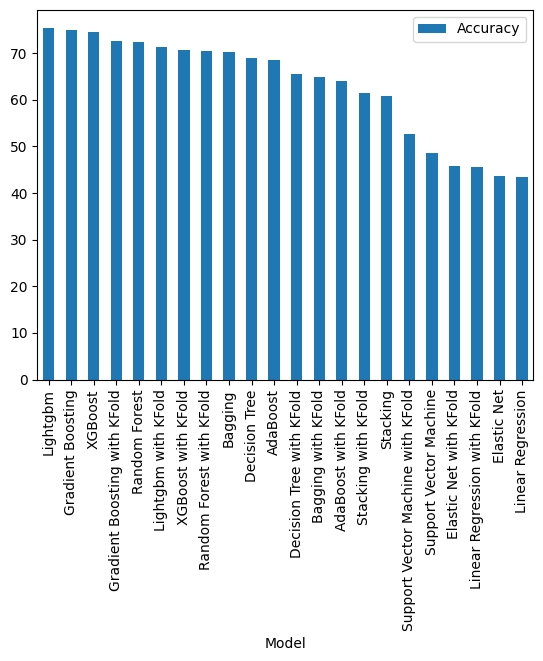

In [ ]:
modelsummary.plot.bar(x='Model', y='Accuracy')